In [2]:
from sklearn.decomposition import PCA
from scipy.spatial import distance as sdist
import mdtraj as md
import seaborn as sns
import matplotlib.pyplot as plt
import pandas
import numpy as np
import prody

In [3]:
coords=[]
ref = md.load("1/freeRRMs-openmmawsem.pdb")
n = np.loadtxt("nail.index")

In [4]:
nail = [a.index for a in ref.topology.atoms if a.name == 'CA' and a.residue.index in n]
print(nail)

[77, 83, 88, 93, 98, 103, 439, 445, 468, 550, 556, 562, 567]


In [8]:
for f in range(1,21):
    traj = md.load('%i/movie.pdb'%f)
    traj_nail = [a.index for a in traj.topology.atoms if a.name == 'CA' and a.residue.index in n]
    traj_aligned = traj.superpose(ref, atom_indices=traj_nail, ref_atom_indices=nail, parallel=False)
    CA = [a.index for a in traj_aligned.topology.atoms if a.name == 'CA']
    coords.append(traj_aligned.restrict_atoms(CA).xyz.reshape(traj.n_frames, len(CA) * 3))

np.shape(coords)

(20, 600, 600)

In [9]:
Coords=np.concatenate(coords)
np.shape(Coords)
centered_coords = Coords - Coords.mean(axis=0)
np.shape(Coords.mean(axis=0))
np.savetxt('new_cartesin_mean_coords.dat', Coords.mean(axis=0))

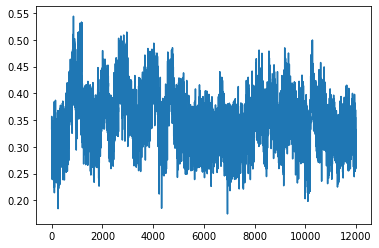

In [14]:
plt.plot(Coords[:,291])

In [15]:
pca=PCA(n_components=min(centered_coords.shape))
pca.fit(centered_coords)

np.savetxt('new_cartesin_explained_variance_ratio.dat', pca.explained_variance_ratio_)
np.savetxt('new_cartesin_components.dat', pca.components_)

projection=np.dot(pca.components_, centered_coords.T).T
np.savetxt('new_cartesin_projection.dat', projection)

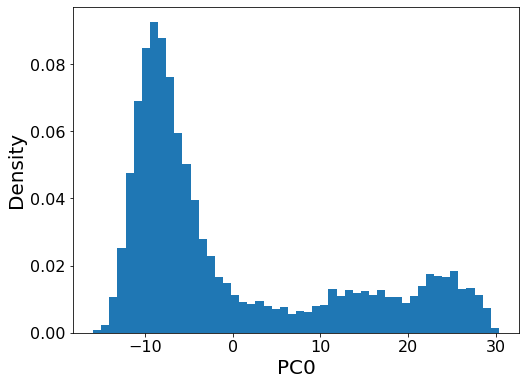

In [19]:
fig = plt.figure(figsize=(8,6))
plt.hist(projection[:,0], bins=50, density=True)
plt.xlabel('PC0', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig("new_rrms-f-pc0.png")

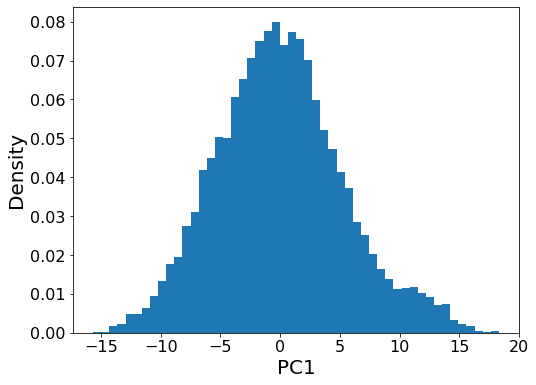

In [20]:
fig = plt.figure(figsize=(8,6))
plt.hist(projection[:,1], bins=50, density=True)
plt.xlabel('PC1', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig("new_rrms-f-pc1.png")

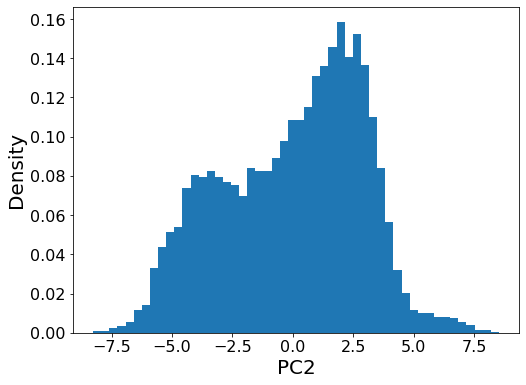

In [21]:
fig = plt.figure(figsize=(8,6))
plt.hist(projection[:,2], bins=50, density=True)
plt.xlabel('PC2', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig("new_rrms-f-pc2.png")

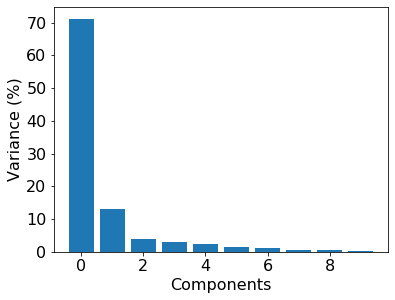

In [18]:
plt.figure(figsize=(6,4.5))
plt.bar(range(10),pca.explained_variance_ratio_[:10]*100)
plt.ylabel('Variance (%)', fontsize=16)
plt.xlabel('Components', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig("new_variance_10.png")

In [23]:
CA = [a.index for a in ref.topology.atoms if a.name == 'CA']
ref_coords = ref.restrict_atoms(CA).xyz.reshape(len(CA) * 3)
ref_Coords = ref_coords - Coords.mean(axis=0)
print(np.dot(pca.components_[0], ref_Coords.T))
print(np.dot(pca.components_[1], ref_Coords.T))
print(np.dot(pca.components_[2], ref_Coords.T))

15.092531
-5.337877
-0.676816


In [32]:
test=[]
bind = md.load("../../../RBD/bind/equil/1/clean.pdb")
bind_nail = [a.index for a in bind.topology.atoms if a.name == 'CA' and a.residue.index-5 in n]
print([a.residue.index for a in bind.topology.atoms if a.name == 'CA'])

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204]


In [34]:
ref = md.load("1/freeRRMs-openmmawsem.pdb")
bind_aligned = bind.superpose(ref, atom_indices=bind_nail, ref_atom_indices=nail, parallel=False)
CA = [a.index for a in bind_aligned.topology.atoms if a.name == 'CA']
test = bind_aligned.restrict_atoms(CA).xyz.reshape(bind.n_frames, len(CA) * 3)
Test = test - Coords.mean(axis=0)
print(np.dot(pca.components_[0], Test.T))
print(np.dot(pca.components_[1], Test.T))
print(np.dot(pca.components_[2], Test.T))

[-0.25288558]
[-8.013519]
[-7.6104164]


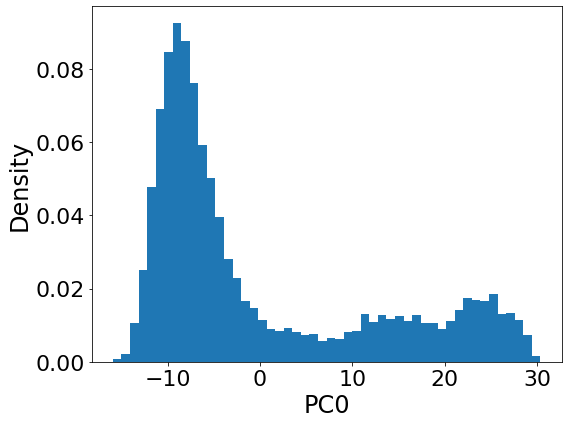

In [14]:
fig = plt.figure(figsize=(8,6))
plt.hist(projection[:,0], bins=50, density=True)
plt.xlabel('PC0', fontsize=24)
plt.ylabel('Density', fontsize=24)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.tight_layout()
plt.savefig("new_rrms-f-pc0.png")

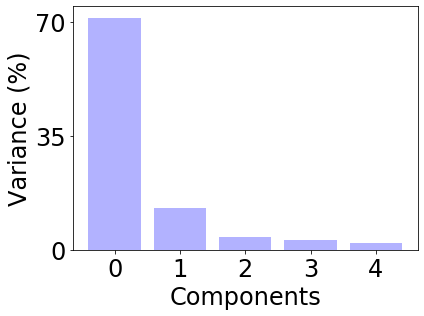

In [11]:
explained_variance_ratio_=np.loadtxt("new_cartesin_explained_variance_ratio.dat")

plt.figure(figsize=(6,4.5))
plt.bar(range(5),explained_variance_ratio_[:5]*100,color='b', alpha=0.3)
plt.ylabel('Variance (%)', fontsize=24)
plt.xlabel('Components', fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(np.arange(0, 71, step=35),fontsize=24)
plt.tight_layout()
plt.savefig("new_variance_5.png")